# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch
import tensorflow as tf

In [2]:
device = torch.device("cuda:3") # if torch.cuda.is_available() else "cpu")

In [3]:
dataset = DataLoader(data_dir="DDICorpus", device=device)

Printing Data_df
              sentence_id     token_id char_start_id char_end_id  split
1    DDI-DrugBank.d436.s0           No             0           1  train
2    DDI-DrugBank.d436.s0         drug             3           6  train
3    DDI-DrugBank.d436.s0  nutritional             8          18  train
4    DDI-DrugBank.d436.s0   supplement            20          29  train
5    DDI-DrugBank.d436.s0         food            31          34  train
..                    ...          ...           ...         ...    ...
208  DDI-DrugBank.d297.s5         such           132         135  train
209  DDI-DrugBank.d297.s5          use           137         139  train
210  DDI-DrugBank.d297.s5           is           141         142  train
211  DDI-DrugBank.d297.s5          not           144         146  train
212  DDI-DrugBank.d297.s5  recommended           148         158  train

[212 rows x 5 columns]
---
Printing Ner_df
             sentence_id ner_id char_start_id char_end_id
1   DDI-DrugBank.

In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
1,DDI-DrugBank.d436.s0,7,0,1,train
2,DDI-DrugBank.d436.s0,53,3,6,train
3,DDI-DrugBank.d436.s0,90,8,18,train
4,DDI-DrugBank.d436.s0,118,20,29,train
5,DDI-DrugBank.d436.s0,59,31,34,train


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
1,DDI-DrugBank.d519.s0,0,45,52
2,DDI-DrugBank.d519.s1,0,66,73
3,DDI-DrugBank.d519.s2,0,0,7
4,DDI-DrugBank.d519.s3,0,29,36
5,DDI-DrugBank.d519.s3,1,83,94


In [6]:
dataset.vocab[:15]

['Concurrent',
 'Cytochrome',
 'Day',
 'Formal',
 'Laboratory',
 'MTX',
 'NSAIDs',
 'No',
 'ORENCIA',
 'PSA',
 'Periodic',
 'Plenaxis',
 'Population',
 'RA',
 'Response']

In [7]:
dataset.id2ner

{0: 'brand', 1: 'drug', 2: 'group'}

In [8]:
dataset.max_sample_length

33

In [9]:
dataset.get_random_sample()

/home/gusflesjo@GU.GU.SE/lt2316-h20-aa/aa/data_loading.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'Population pharmacokinetic analyses revealed that DRUG:MTX NSAIDs corticosteroids GROUP:and TNF GROUP:blocking GROUP:agents GROUP:did not influence abatacept DRUG:clearance'

### Data Exploration

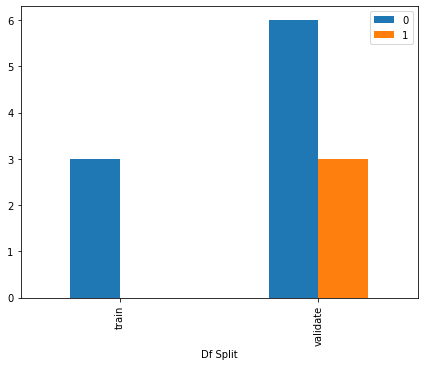

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y = check_output(dataset.get_y()) #, test_y

## Extracting Features

In [12]:
#print(extract_features(dataset.data_df, dataset.max_sample_length, dataset.id2word))



train_X, val_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        id2word = dataset.id2word,
                                                        device = device
                                                        )) #, test_X

[[3, 5, 1, 6], [72, 7, 0, 11], [63, 13, 0, 4], [38, 16, 0, 4], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[21, 7, 0, 9], [70, 7, 0, 9], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[16, 7, 1, 3], [132, 4, 0, 4], [51, 9, 0, 15], [78, 7, 0, 11], [4

## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

In [14]:
#dataset.plot_ner_per_sample_distribution()

In [15]:
#dataset.plot_sample_length_distribution()

In [16]:
#dataset.plot_ner_cooccurence_venndiagram()